In [84]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("loans_full_schema.csv")

pd.set_option("display.max_columns", None)
df[:1]

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0


In [85]:
df['state'].unique()

array(['NJ', 'HI', 'WI', 'PA', 'CA', 'KY', 'MI', 'AZ', 'NV', 'IL', 'FL',
       'SC', 'CO', 'TN', 'TX', 'VA', 'NY', 'GA', 'MO', 'AR', 'MD', 'NC',
       'NE', 'WV', 'NH', 'UT', 'DE', 'MA', 'OR', 'OH', 'OK', 'SD', 'MN',
       'AL', 'WY', 'LA', 'IN', 'KS', 'MS', 'WA', 'ME', 'VT', 'CT', 'NM',
       'AK', 'MT', 'RI', 'ND', 'DC', 'ID'], dtype=object)

In [86]:
pd.set_option('display.max_rows',  df.shape[0]+1)
# missing = df.isnull().sum()
"""
    sum of missing values per column

emp_title                            833
emp_length                           817
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
months_since_last_delinq            5658
months_since_90d_late               7715
months_since_last_credit_inquiry    1271
num_accounts_120d_past_due           318
"""


'\n    sum of missing values per column\n\nemp_title                            833\nemp_length                           817\ndebt_to_income                        24\nannual_income_joint                 8505\nverification_income_joint           8545\ndebt_to_income_joint                8505\nmonths_since_last_delinq            5658\nmonths_since_90d_late               7715\nmonths_since_last_credit_inquiry    1271\nnum_accounts_120d_past_due           318\n'

# Describe the dataset and any issues with it.
The Lending Club data set contains information on thousands of loans made through the Lending Club platform. It includes a variety of features related to the borrower, such as their employment status, credit score, and income, as well as features related to the loan, such as the loan amount, interest rate, and term. There are 55 variables in total, including both numerical and categorical variables.

There are a few potential issues with this data set.
First off al there are missing values some variables, however they are not going to be used for the data exploration and visualization.
Another issue is that it only represents loans that were actually made, not all loan applications.
This means that it is possible that some of the riskier borrowers were not included in the data set
because they were not offered a loan or did not accept a loan offer due to a high interest rate.
Another issue is that the data may be biased towards borrowers with higher
credit scores, since these borrowers may be more likely to be approved for a loan and to accept a loan offer.
These issues should be kept in mind when interpreting the results of any analysis or visualizations using this data.

In [87]:
# 5  visualization plots

# 1. A scatter plotA scatterplot of loan amount versus interest rate, with different colors representing different credit scores.

# 2. A map of the United States with a choropleth map showing the average interest rate by state.

# 3. A box plot of interest rate by income bracket. This visualization could show whether there is a relationship between borrower income and the interest rate they are offered.

# 4. A pie chart of loan purpose percentages.

# 5. 

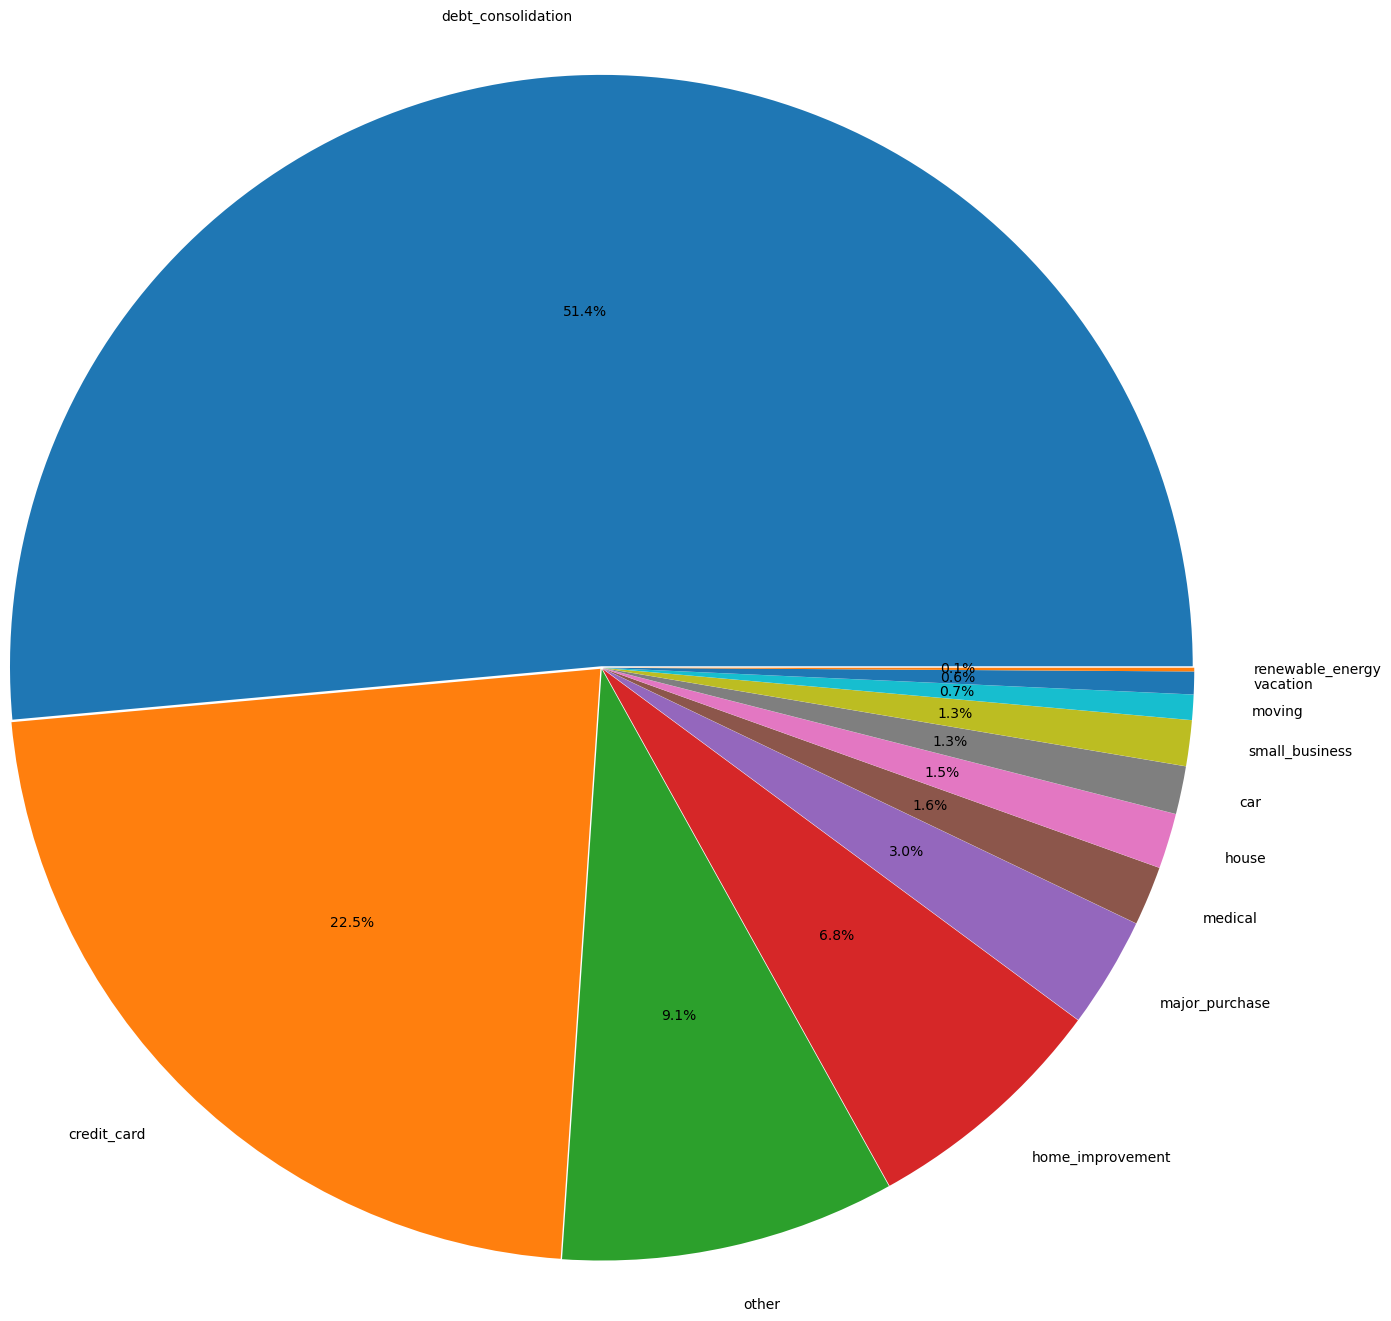

In [88]:
import matplotlib.pyplot  as plt


fig1, ax1 = plt.subplots()

# Count the number of loans for each purpose
purposes = df['loan_purpose'].value_counts()

# Calculate the percentages
percentages = purposes / purposes.sum()
explode = [0.01]  * len(percentages)

# Create the pie chart with smaller labels
plt.pie(percentages, labels=purposes.index, explode=explode, autopct='%1.1f%%', radius=4)

# Add a title
# plt.title('Loan Purpose Percentages')

# plt.tight_layout()
plt.show()



In [89]:
import plotly_express as px
import plotly.graph_objects as go

state_rates = df.groupby('state')['interest_rate'].mean()
state_rates_df = pd.DataFrame({"state":state_rates.index, "interest_rate":state_rates.values})
fig = px.choropleth(state_rates_df,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='interest_rate',
                    color_continuous_scale="Viridis_r",
                    title='Average Interest Rate by State',
                    )
fig.show()

In [90]:
state_rates = df.groupby('state')['annual_income'].mean()
ann_incomes_df = pd.DataFrame({"state":state_rates.index, "annual_income":state_rates.values})
fig = px.choropleth(ann_incomes_df,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='annual_income',
                    color_continuous_scale="Viridis_r",
                    title='Annual Income by State' 
                    )
fig.show()

In [91]:
loans_per_state = df.groupby('state').size()
# Convert the Series to a DataFrame
loans_per_state_df = loans_per_state.to_frame(name='number_of_loans')

# Reset the index of the DataFrame to move the state column to the data
loans_per_state_df = loans_per_state_df.reset_index()

fig = px.choropleth(loans_per_state_df,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='number_of_loans',
                    color_continuous_scale="Viridis_r",
                    title='Number of loans per State' 
                    )
fig.show()

In [92]:
len(df[df["application_type"]=="NaN"])
df["application_type"].value_counts()


individual    8505
joint         1495
Name: application_type, dtype: int64

In [93]:
"""
    sum of missing values per column
debt_to_income                        24
num_accounts_120d_past_due           318
emp_title                            833 should be dropped
emp_length                           817 should be dropped   
annual_income_joint                 8505 should be dropped
verification_income_joint           8545 should be dropped
debt_to_income_joint                8505 should be dropped
months_since_last_delinq            5658 should be dropped
months_since_90d_late               7715 should be dropped
months_since_last_credit_inquiry    1271 should be dropped

since we only have 10000 examples we cannot afford to remove much data with missing values,
thus we should drop columns where a lot of data is missing
"""

def get_clean_set(df):
    new_df = df_copy = df.copy()
    columns_to_drop = ['annual_income_joint', 'verification_income_joint', 'debt_to_income_joint', 
                   'months_since_last_delinq', 'months_since_90d_late', 'months_since_last_credit_inquiry', 'emp_title', 'emp_length']
    new_df = new_df.drop(columns_to_drop, axis=1)
    new_df = new_df.dropna(subset=['debt_to_income', 'num_accounts_120d_past_due'])
    # use one-hot encoding to convert the 'state' column
    # create a mapping from state codes to float values
    state_mapping = {'NJ': 1.0,  'HI':  2.0, 'WI':  3.0, 'PA':  4.0, 'CA':  5.0, 'KY':  6.0, 'MI':  7.0, 'AZ':  8.0, 'NV': 9.0,  'IL': 10.0, 'FL': 11.0,
                     'SC': 12.0, 'CO': 13.0, 'TN': 14.0, 'TX': 15.0, 'VA': 16.0, 'NY': 17.0, 'GA': 18.0, 'MO': 19.0, 'AR': 20.0, 'MD': 21.0, 'NC': 22.0,
                     'NE': 23.0, 'WV': 24.0, 'NH': 25.0, 'UT': 26.0, 'DE': 27.0, 'MA': 28.0, 'OR': 29.0, 'OH': 30.0, 'OK': 31.0, 'SD': 32.0, 'MN': 33.0,
                     'AL': 34.0, 'WY': 35.0, 'LA': 36.0, 'IN': 37.0, 'KS': 38.0, 'MS': 39.0, 'WA': 40.0, 'ME': 41.0, 'VT': 42.0, 'CT': 43.0, 'NM': 44.0,
                     'AK': 45.0, 'MT': 46.0, 'RI': 47.0, 'ND': 48.0, 'DC': 49.0, 'ID': 50.0}
    home_ownership_mapping = {'MORTGAGE':1.0, 'RENT':2.0, 'OWN':3.0}
    verified_income_mapping = {'Verified':1.0, 'Not Verified':2.0, 'Source Verified':3.0}
    loan_purpose_mapping = {'moving':0, 'debt_consolidation':1, 'other':2, 'credit_card':3.0,
       'home_improvement':4.0, 'medical':5.0, 'house':6.0, 'small_business':7.0, 'car':8.0,
       'major_purchase':9.0, 'vacation':10.0, 'renewable_energy':11.0}
    app_type_mapping = {'individual':0, 'joint':1}
    grade_mapping = {'C':3.0, 'D':4.0, 'A':1.0, 'B':2.0, 'F':6.0, 'E':5.0, 'G':7.0}
    subgrade_mapping = {'C3':13.0, 'C1':11.0, 'D1':16.0, 'A3':3.0, 'C2':12.0, 'B5':10.0,
                        'C4':14.0, 'B2':7.0, 'B1':6.0, 'D3':18.0, 'F1':21.0,  'E5':20.0,
                        'A2':2.0, 'A5':5.0, 'A4':4.0, 'A1':1.0, 'D4':19.0, 'D5':20.0,
                        'B3':8.0, 'D2':17.0, 'E1':16.0, 'G1':26.0, 'B4':9.0, 'C5':15.0,
                        'E2':17.0, 'E4':19.0, 'F3':23.0, 'E3':18.0, 'F5':25.0, 'F2':22.0,
                        'F4':24.0, 'G4':27.0}
    init_list_status_mapping = {'whole':1.0, 'fractional':2.0}
    disbursement_method_mapping = {'Cash':0.0, 'DirectPay':2.0}
    loan_status_mapping = {'Current':0.0, 'Fully Paid':1.0, 'In Grace Period':2.0, 'Late (31-120 days)':3.0,
       'Charged Off':4.0, 'Late (16-30 days)':5.0}
    # map the state codes to float values
    new_df['state'] = df['state'].map(state_mapping)
    new_df['homeownership'] = df['homeownership'].map(home_ownership_mapping)
    new_df['verified_income'] = df['verified_income'].map(verified_income_mapping)
    new_df['loan_purpose'] = df['loan_purpose'].map(loan_purpose_mapping)
    new_df['application_type'] = df['application_type'].map(app_type_mapping)
    new_df['grade'] = df['grade'].map(grade_mapping)
    new_df['sub_grade'] = df['sub_grade'].map(subgrade_mapping)
    new_df['initial_listing_status'] = new_df['initial_listing_status'].map(init_list_status_mapping)
    new_df['disbursement_method'] = new_df['disbursement_method'].map(disbursement_method_mapping)
    new_df['loan_status'] = new_df['loan_status'].map(loan_status_mapping)
    return new_df

model_df = get_clean_set(df)
#print(len(model_df))
model_df.isnull().sum() # shows no missing values

state                           0
homeownership                   0
annual_income                   0
verified_income                 0
debt_to_income                  0
delinq_2y                       0
earliest_credit_line            0
inquiries_last_12m              0
total_credit_lines              0
open_credit_lines               0
total_credit_limit              0
total_credit_utilized           0
num_collections_last_12m        0
num_historical_failed_to_pay    0
current_accounts_delinq         0
total_collection_amount_ever    0
current_installment_accounts    0
accounts_opened_24m             0
num_satisfactory_accounts       0
num_accounts_120d_past_due      0
num_accounts_30d_past_due       0
num_active_debit_accounts       0
total_debit_limit               0
num_total_cc_accounts           0
num_open_cc_accounts            0
num_cc_carrying_balance         0
num_mort_accounts               0
account_never_delinq_percent    0
tax_liens                       0
public_record_

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

features = [
       'state', 'homeownership', 'annual_income', 'verified_income',
       'debt_to_income', 'delinq_2y', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'current_accounts_delinq', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_purpose', 'application_type', 'loan_amount', 'term',
       'interest_rate', 'installment', 'grade', 'sub_grade',
       'loan_status', 'initial_listing_status', 'balance', 'paid_total', 'paid_principal', 'paid_late_fees'
       ]
X_train, X_test, y_train, y_test = train_test_split(model_df[features], model_df['interest_rate'], test_size=0.05)

# fit a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

If I had more time, i would study more which features affect more interest_rate and would choose a model that fits the problem more than the current models.